In [ ]:
getwd()

[1] "/content"

In [ ]:
setwd('/content')
getwd()
list.files()

[1] "/content"

[1] "d-exuseu.txt"     "d-sbuxsp0106.txt" "m-pg5606.txt"     "sample_data"

In [ ]:
sbu_data <- read.table("d-sbuxsp0106.txt", header = FALSE)
exu_data <- read.table("d-exuseu.txt", header = FALSE)
pg_data <- read.table("m-pg5606.txt", header = FALSE)
# head(pg_data)

In [ ]:
install.packages("tseries")
install.packages("fGarch")
install.packages("xts")
install.packages("FinTS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘gss’, ‘stabledist’, ‘gbutils’, ‘Rdpack’, ‘fBasics’, ‘timeDate’, ‘timeSeries’, ‘fastICA’, ‘cvar’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#question1
library(tseries)
library(fGarch)
library(xts)
head(sbu_data)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




,V1,V2,V3
,<int>,<dbl>,<dbl>
1,20010102,-0.04944,-0.028032
2,20010103,0.02823,0.050099
3,20010104,-0.04913,-0.010552
4,20010105,0.01520,-0.026242
5,20010108,0.01647,-0.001918
6,20010109,-0.01620,0.003812


In [ ]:
library(FinTS)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = sbux_log_returns, cond.dist = "norm", 
    trace = FALSE) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x55e954818730>
 [data = sbux_log_returns]

Conditional Distribution:
 norm 

Coefficient(s):
      mu     omega    alpha1     beta1  
0.123271  0.015944  0.019645  0.976117  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu      0.123271    0.047728    2.583   0.0098 ** 
omega   0.015944    0.006659    2.394   0.0167 *  
alpha1  0.019645    0.003979    4.937 7.93e-07 ***
beta1   0.976117    0.004462  218.764  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 -3155.678    normalized:  -2.094013 

Description:
 Fri Nov  8 04:35:43 2024 by user:  


Standardised Residuals Tests:
                                  Statistic   p-Value
 Jarque-Bera Test   R    Chi^2  999.1124555 0.0000000
 Shapiro-W

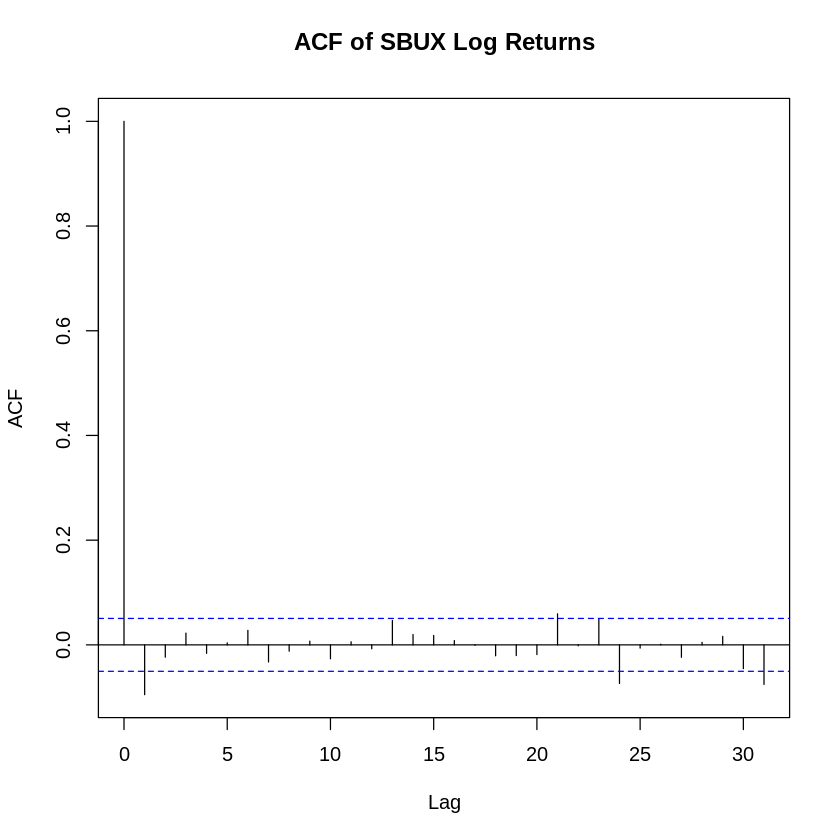

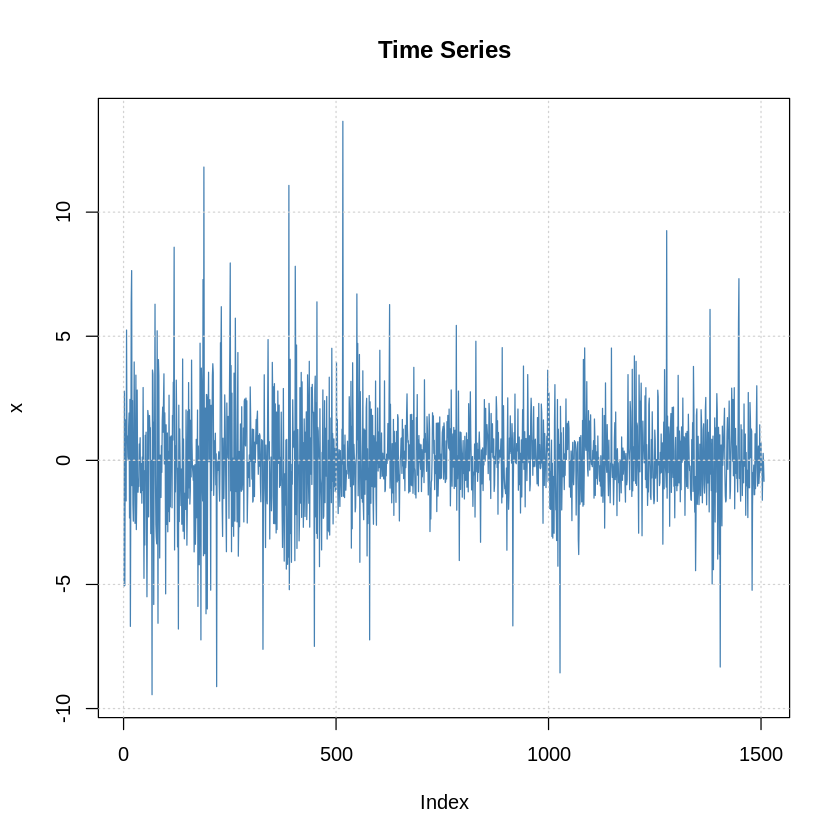

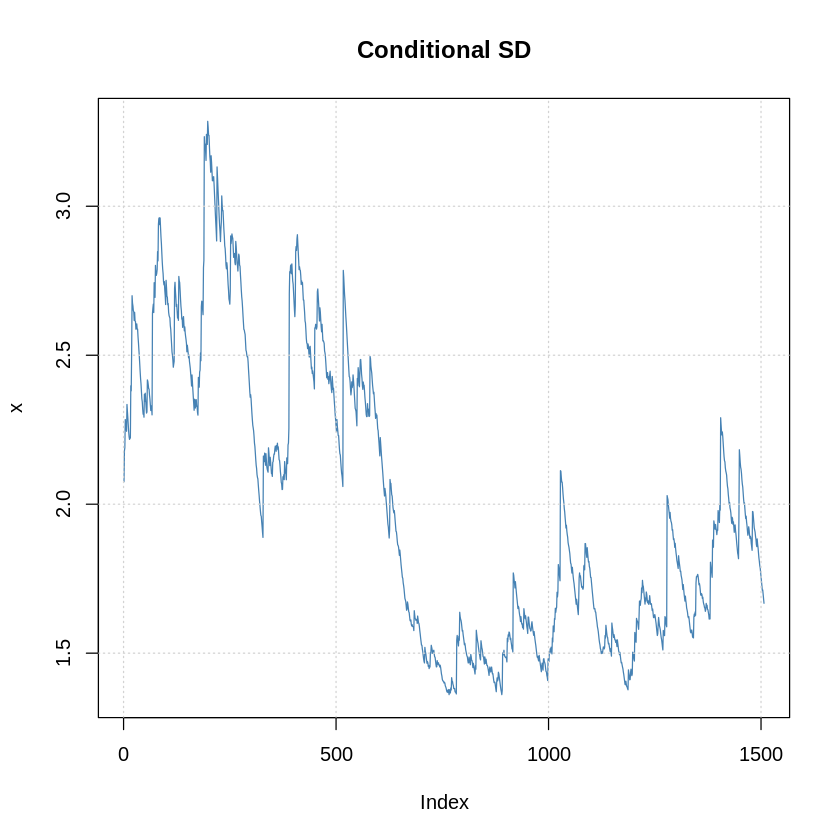

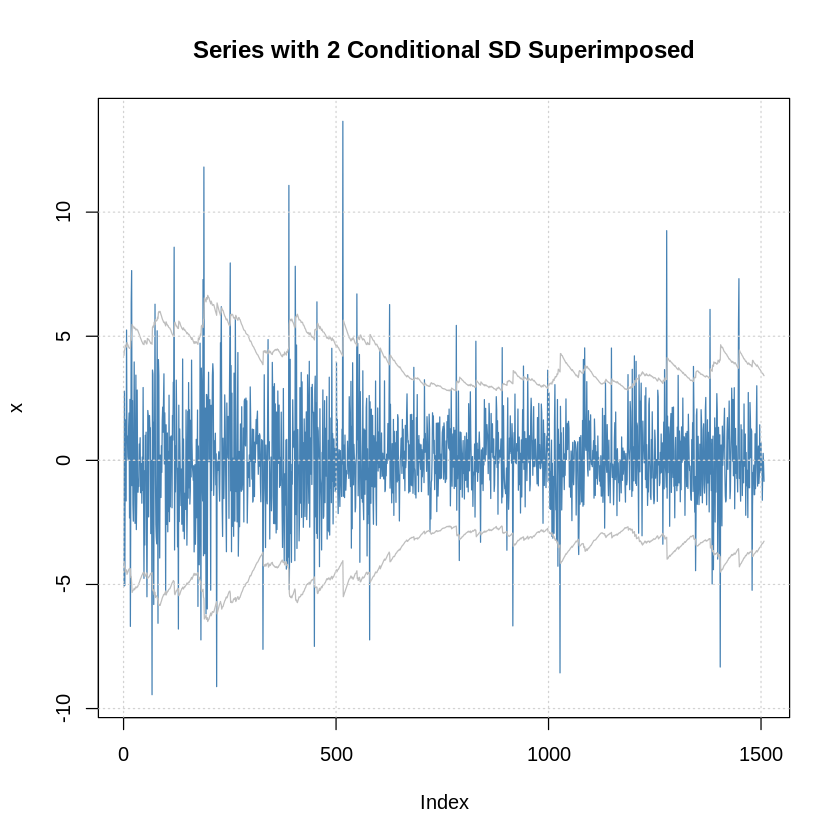

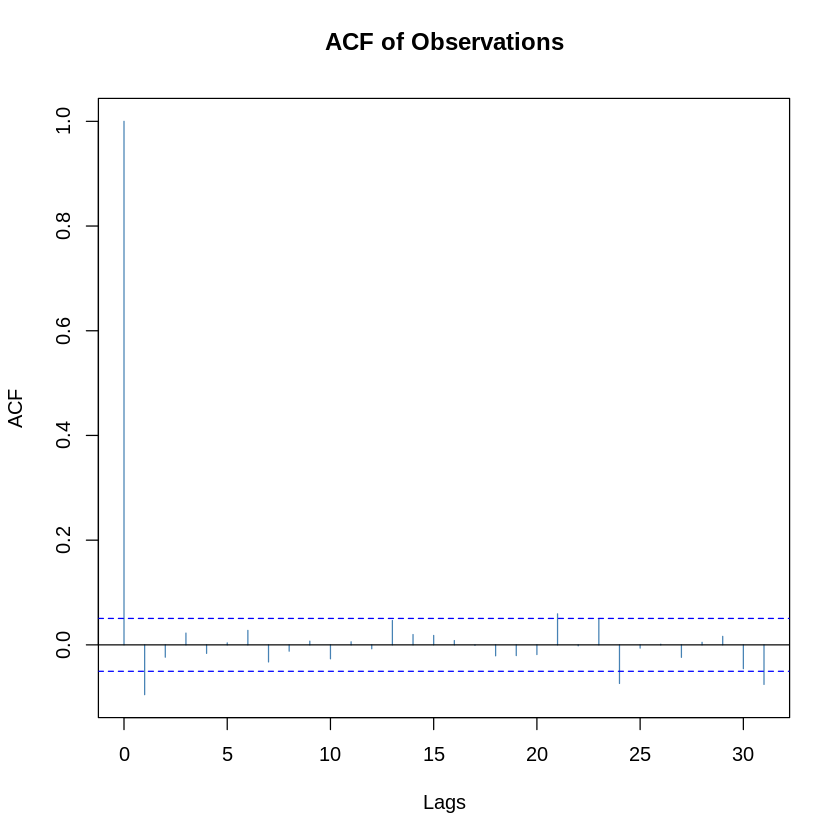

In [ ]:
data = sbu_data
data$V2_log_return <- log(1 + data$V2) * 100
data$V3_log_return <- log(1 + data$V3) * 100

sbux_log_returns <- data$V2_log_return
acf(sbux_log_returns, main = "ACF of SBUX Log Returns")
serial_correlation_test <- Box.test(sbux_log_returns, lag = 10, type = "Ljung-Box")

arch_test <- ArchTest(sbux_log_returns, lags = 10)

garch_model <- garchFit(~ garch(1, 1), data = sbux_log_returns, cond.dist = "norm", trace = FALSE)
summary(garch_model)

plot(garch_model, which = 1)
plot(garch_model, which = 2)
plot(garch_model, which = 3)
plot(garch_model, which = 4)

In [ ]:
data = sbu_data
data$V2_log_return <- log(1 + data$V2) * 100
data$V3_log_return <- log(1 + data$V3) * 100
#print(data$V2_log_return)

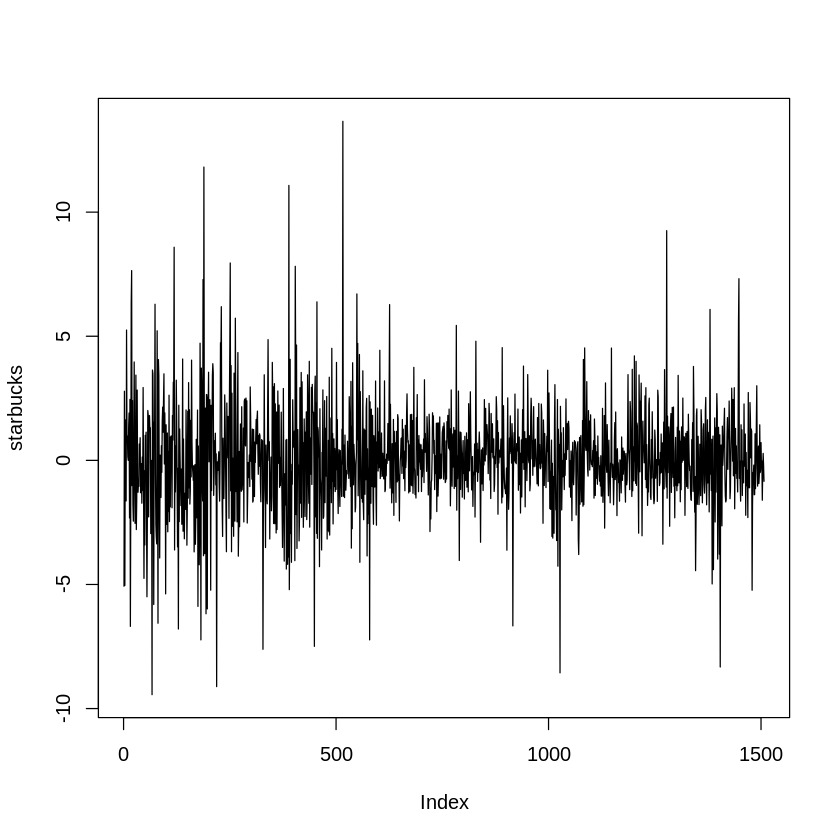

In [ ]:
starbucks = data$V2_log_return
plot(starbucks, type = 'l')

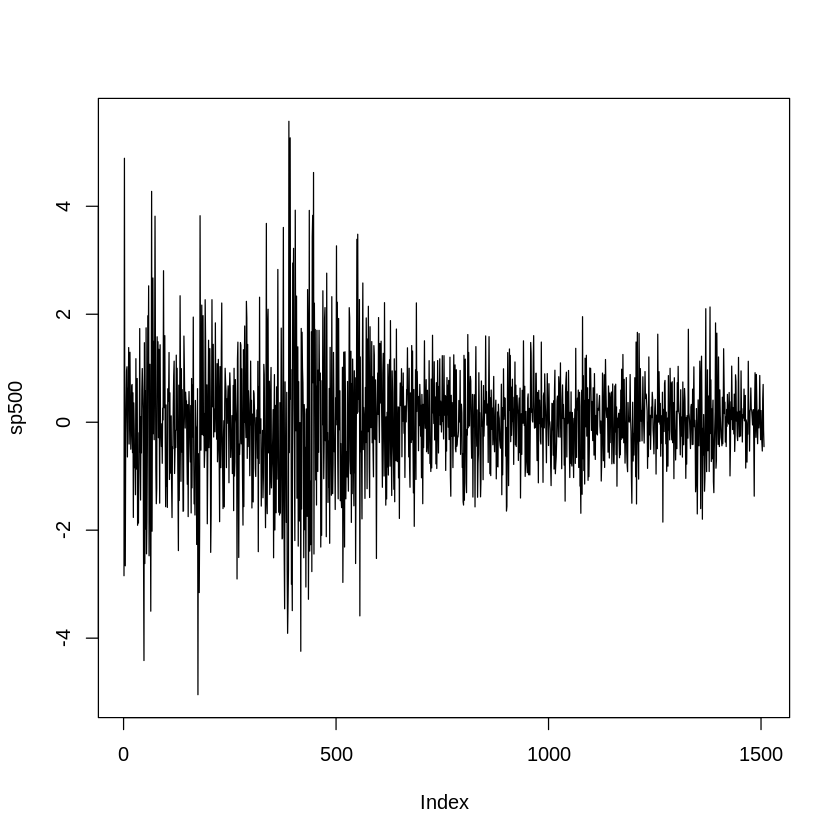

In [ ]:
sp500 = data$V3_log_return
plot(sp500, type = 'l')

In [ ]:
png("acf_starbucks.png", width = 800, height = 600)

acf(starbucks, lag.max = 10, main = "ACF of Starbucks Returns")

dev.off()

pdf 
  2

In [ ]:
png("pacf_starbucks.png", width = 800, height = 600)

pacf(starbucks, lag.max = 10, main = "PACF of Starbucks Returns")

dev.off()

pdf 
  2

In [ ]:
Box.test(starbucks,lag=10,type="Ljung")


	Box-Ljung test

data:  starbucks
X-squared = 19.823, df = 10, p-value = 0.03098


In [ ]:
at = starbucks - mean(starbucks)

In [ ]:
png("acf1_arch.png", width = 800, height = 600)
acf(at^2,10,main="ACF",col="red",ylim=c(-1,1))
dev.off()

png("pacf1_arch.png", width = 800, height = 600)
acf(at^2,10,main="PACF",col="red",ylim=c(-1,1))
dev.off()

Box.test(at^2,lag=10,type="Ljung")

pdf 
  2

pdf 
  2


	Box-Ljung test

data:  at^2
X-squared = 59.142, df = 10, p-value = 5.265e-09


In [ ]:
n <- length(starbucks)

residuals_squared <- (starbucks - mean(starbucks))^2

acf_values <- acf(residuals_squared, plot = FALSE)$acf[-1]
m <- 10
acf_values <- acf_values[1:m]

Q_m <- n * (n + 2) * sum(acf_values^2 / (n - (1:m)))

p_value <- 1 - pchisq(Q_m, df = m)

cat("Ljung-Box Q statistic:", Q_m, "\n")
cat("p-value:", p_value, "\n")

Ljung-Box Q statistic: 59.14228 
p-value: 5.264507e-09 


In [ ]:
m1=garchFit(~ garch(1,1),data=starbucks,trace=F,cond.dist = "norm")
summary(m1)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = starbucks, cond.dist = "norm", 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x55e95587e400>
 [data = starbucks]

Conditional Distribution:
 norm 

Coefficient(s):
      mu     omega    alpha1     beta1  
0.123271  0.015944  0.019645  0.976117  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu      0.123271    0.047728    2.583   0.0098 ** 
omega   0.015944    0.006659    2.394   0.0167 *  
alpha1  0.019645    0.003979    4.937 7.93e-07 ***
beta1   0.976117    0.004462  218.764  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 -3155.678    normalized:  -2.094013 

Description:
 Fri Nov  8 04:35:45 2024 by user:  


Standardised Residuals Tests:
                                  Statistic   p-Value
 Jarque-Bera Test   R    Chi^2  999.1124555 0.0000000
 Shapiro-Wilk Test  R    W  

In [ ]:
stresi=residuals(m1,standardize=T)
png("resid1.png", width = 800, height = 600)
plot(stresi,type="l",main = 'Standardized residuals')
dev.off()
Box.test(stresi,10,type="Ljung")
Box.test(stresi^2,10,type="Ljung")

predict(m1,5)

pdf 
  2


	Box-Ljung test

data:  stresi
X-squared = 11.197, df = 10, p-value = 0.3423



	Box-Ljung test

data:  stresi^2
X-squared = 4.3155, df = 10, p-value = 0.932


meanForecast,meanError,standardDeviation
<dbl>,<dbl>,<dbl>
0.1232707,1.657862,1.657862
0.1232707,1.659157,1.659157
0.1232707,1.660445,1.660445
0.1232707,1.661728,1.661728
0.1232707,1.663003,1.663003


In [ ]:
png("acf_S&P500.png", width = 800, height = 600)

acf(sp500, lag.max = 10, main = "ACF of S&P500")

dev.off()

pdf 
  2

In [ ]:
png("pacf_S&P500.png", width = 800, height = 600)

pacf(sp500, lag.max = 10, main = "PACF of S&P500")

dev.off()

pdf 
  2

In [ ]:
Box.test(sp500,lag=10,type="Ljung")


	Box-Ljung test

data:  sp500
X-squared = 12.253, df = 10, p-value = 0.2685


In [ ]:
at = sp500 - mean(sp500)

In [ ]:
png("acf2_arch.png", width = 800, height = 600)
acf(at^2,10,main="ACF",col="red",ylim=c(-1,1))
dev.off()

png("pacf2_arch.png", width = 800, height = 600)
acf(at^2,10,main="PACF",col="red",ylim=c(-1,1))
dev.off()

Box.test(at^2,lag=10,type="Ljung")

pdf 
  2

pdf 
  2


	Box-Ljung test

data:  at^2
X-squared = 850.73, df = 10, p-value < 2.2e-16


In [ ]:
install.packages("rugarch")
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘fracdiff’, ‘nloptr’, ‘RcppArmadillo’


Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma




In [ ]:
spec = ugarchspec(
  variance.model = list(model = "iGARCH", garchOrder = c(1, 1)),
  mean.model = list(armaOrder = c(0, 0), include.mean = TRUE),
  distribution.model = "norm"
)

In [ ]:
mm = ugarchfit(spec = spec, data = sp500)

In [ ]:
forecast = ugarchforecast(mm, n.ahead = 4)

mean_forecast = forecast@forecast$seriesFor
sigma_forecast = forecast@forecast$sigmaFor

Warning message in `setfixed<-`(`*tmp*`, value = as.list(pars)):
“Unrecognized Parameter in Fixed Values: beta1...Ignored”


In [ ]:
upper_bound = mean_forecast[1] + 1.96 * sigma_forecast[1]
lower_bound = mean_forecast[1] - 1.96 * sigma_forecast[1]

print("1- to 4-Step Ahead Mean Forecasts:")
print(mean_forecast)
print(sigma_forecast)

print("1-Step Forecasting Interval:")
print(paste("Lower Bound:", lower_bound))
print(paste("Upper Bound:", upper_bound))

[1] "1- to 4-Step Ahead Mean Forecasts:"
    1974-02-16
T+1 0.03969969
T+2 0.03969969
T+3 0.03969969
T+4 0.03969969
    1974-02-16
T+1  0.5002666
T+2  0.5034554
T+3  0.5066241
T+4  0.5097731
[1] "1-Step Forecasting Interval:"
[1] "Lower Bound: -0.940822894339783"
[1] "Upper Bound: 1.02022227803591"


In [ ]:
#question3

In [ ]:
spec_garch_m = ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1, 1)),
  mean.model = list(armaOrder = c(0, 0), include.mean = TRUE, archm = TRUE, archpow = 2),
  distribution.model = "norm"
)

In [ ]:
fit_garch_m = ugarchfit(spec = spec_garch_m, data = starbucks)

In [ ]:
fit_garch_m


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.200579    0.112709   1.77961 0.075139
archm  -0.022281    0.029817  -0.74726 0.454907
omega   0.016130    0.005970   2.70175 0.006897
alpha1  0.019818    0.001982   9.99963 0.000000
beta1   0.975892    0.001020 956.56215 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.200579    0.113848   1.76181 0.078101
archm  -0.022281    0.030978  -0.71925 0.471986
omega   0.016130    0.010918   1.47741 0.139567
alpha1  0.019818    0.003121   6.34924 0.000000
beta1   0.975892    0.002123 459.68629 0.000000

LogLikelihood : -3155.382 

Information Criteria
------------------------------------
   

In [ ]:
spec_egarch = ugarchspec(
  variance.model = list(model = "eGARCH", garchOrder = c(1, 1)),
  mean.model = list(armaOrder = c(0, 0), include.mean = TRUE),
  distribution.model = "norm"
)

In [ ]:
fit_egarch = ugarchfit(spec = spec_egarch, data = starbucks)

In [ ]:
fit_egarch


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.091646    0.049019      1.8696 0.061541
omega   0.010881    0.001550      7.0196 0.000000
alpha1 -0.039494    0.008608     -4.5882 0.000004
beta1   0.993388    0.000003 356682.3361 0.000000
gamma1  0.047897    0.002284     20.9709 0.000000

Robust Standard Errors:
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.091646    0.057577      1.5917 0.111451
omega   0.010881    0.002003      5.4332 0.000000
alpha1 -0.039494    0.013822     -2.8574 0.004271
beta1   0.993388    0.000005 212346.5760 0.000000
gamma1  0.047897    0.003093     15.4842 0.000000

LogLikelihood : -3136.98 

Information Criteria
-----------------

In [ ]:
stresi=residuals(fit_egarch,standardize=T)
png("resid3.png", width = 800, height = 600)
plot(stresi, type = "l", main = "Standardized residuals")
dev.off()
Box.test(stresi,10,type="Ljung")
Box.test(stresi^2,10,type="Ljung")

pdf 
  2


	Box-Ljung test

data:  stresi
X-squared = 11.669, df = 10, p-value = 0.3078



	Box-Ljung test

data:  stresi^2
X-squared = 4.7936, df = 10, p-value = 0.9045


In [ ]:
data <- log(1 + pg_data$V2) * 100
head(data)

[1] -2.838919  3.876869  6.595627  0.507709 -5.044103  3.648621

In [ ]:
png("acf_pg.png", width = 800, height = 600)
acf(data, lag.max = 10, main = "ACF of PG Returns")
dev.off()

pdf 
  2

In [ ]:
png("pacf_pg.png", width = 800, height = 600)
acf(data, lag.max = 10, main = "PACF of PG Returns")
dev.off()

pdf 
  2

In [ ]:
Box.test(data,lag=10,type="Ljung")


	Box-Ljung test

data:  data
X-squared = 9.65, df = 10, p-value = 0.4717


In [ ]:
m1=garchFit(~ garch(1,1),data=data,trace=F,cond.dist = "norm")
summary(m1)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = data, cond.dist = "norm", 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x55e95a6c20c8>
 [data = data]

Conditional Distribution:
 norm 

Coefficient(s):
      mu     omega    alpha1     beta1  
0.856225  0.853618  0.096304  0.862410  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu       0.85622     0.15801    5.419    6e-08 ***
omega    0.85362     0.39203    2.177 0.029449 *  
alpha1   0.09630     0.02697    3.571 0.000355 ***
beta1    0.86241     0.03133   27.528  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 -1743.948    normalized:  -2.849587 

Description:
 Fri Nov  8 05:27:16 2024 by user:  


Standardised Residuals Tests:
                                  Statistic      p-Value
 Jarque-Bera Test   R    Chi^2  312.8953284 0.000000e+00
 Shapiro-Wilk Test  R    W      

meanForecast,meanError,standardDeviation
<dbl>,<dbl>,<dbl>
0.8562248,2.952357,2.952357
0.8562248,3.034825,3.034825
0.8562248,3.111837,3.111837
0.8562248,3.183920,3.183920
0.8562248,3.251528,3.251528


In [ ]:
forecast = predict(m1, n.ahead = 5)

mean_forecast = forecast$meanForecast
sigma_forecast = forecast$standardDeviation

print("1-step to 5-step ahead mean forecasts:")
print(mean_forecast)

print("1-step to 5-step ahead standard deviations:")
print(sigma_forecast)

[1] "1-step to 5-step ahead mean forecasts:"
[1] 0.8562248 0.8562248 0.8562248 0.8562248 0.8562248
[1] "1-step to 5-step ahead standard deviations:"
[1] 2.952357 3.034825 3.111837 3.183920 3.251528


In [ ]:
lower_bound = mean_forecast[1] - 1.96 * sigma_forecast[1]
upper_bound = mean_forecast[1] + 1.96 * sigma_forecast[1]

print("1-step Forecasting Interval:")
print(paste("Lower Bound:", lower_bound))
print(paste("Upper Bound:", upper_bound))

[1] "1-step Forecasting Interval:"
[1] "Lower Bound: -4.93039472811511"
[1] "Upper Bound: 6.64284435231429"


In [ ]:
exu = exu_data$V4
length(exu)

[1] 2065

In [ ]:
log_returns = diff(log(exu)) * 100
head(log_returns)
print(length(log_returns))

[1] -0.4412021 -1.0600202  0.3089071 -1.0161114 -0.1732502  0.1213067

[1] 2064


In [ ]:
test_result = Box.test(log_returns, lag = 10, type = "Ljung-Box")

print(test_result)


	Box-Ljung test

data:  log_returns
X-squared = 11.921, df = 10, p-value = 0.2904



In [ ]:
png("acf_ex.png", width = 800, height = 600)
acf(log_returns, lag.max = 10, main = "ACF of Exchange rate")
dev.off()

pdf 
  2

In [ ]:
png("pacf_ex.png", width = 800, height = 600)
acf(log_returns, lag.max = 10, main = "PACF of Exchange rate")
dev.off()

pdf 
  2

In [ ]:
Box.test(log_returns,lag=10,type="Ljung")


	Box-Ljung test

data:  log_returns
X-squared = 11.921, df = 10, p-value = 0.2904


In [ ]:
at = log_returns- mean(log_returns)

In [ ]:
png("acf5_arch.png", width = 800, height = 600)
acf(at^2,10,main="ACF",col="red",ylim=c(-1,1))
dev.off()

png("pacf5_arch.png", width = 800, height = 600)
acf(at^2,10,main="PACF",col="red",ylim=c(-1,1))
dev.off()

Box.test(at^2,lag=10,type="Ljung")

pdf 
  2

pdf 
  2


	Box-Ljung test

data:  at^2
X-squared = 29.121, df = 10, p-value = 0.001191


In [ ]:
spec = ugarchspec(
  variance.model = list(model = "iGARCH", garchOrder = c(1, 1)),
  mean.model = list(armaOrder = c(0, 0), include.mean = TRUE),
  distribution.model = "norm"
)

In [ ]:
mm = ugarchfit(spec = spec, data = log_returns)

In [ ]:
mm


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.011123    0.012801 0.868951 0.384874
omega   0.000004    0.000108 0.034425 0.972538
alpha1  0.016037    0.003822 4.196090 0.000027
beta1   0.983963          NA       NA       NA

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.011123    0.013113 0.848267 0.396289
omega   0.000004    0.000070 0.052819 0.957876
alpha1  0.016037    0.004609 3.479640 0.000502
beta1   0.983963          NA       NA       NA

LogLikelihood : -1867.463 

Information Criteria
------------------------------------
                   
Akaike       1.8125
Bayes        1.8207
Shibata      1.8125
Hannan-Quinn 1.8155

Weighted

In [ ]:
stresi=residuals(mm,standardize=T)
png("resid5.png", width = 800, height = 600)
plot(stresi,type="l",main = 'Standardized residuals')
dev.off()
Box.test(stresi,10,type="Ljung")
Box.test(stresi^2,10,type="Ljung")

pdf 
  2


	Box-Ljung test

data:  stresi
X-squared = 9.6109, df = 10, p-value = 0.4753



	Box-Ljung test

data:  stresi^2
X-squared = 11.828, df = 10, p-value = 0.2968


In [ ]:
forecast = ugarchforecast(mm, n.ahead = 4)

mean_forecast = forecast@forecast$seriesFor
sigma_forecast = forecast@forecast$sigmaFor
upper_bound = mean_forecast[1] + 1.96 * sigma_forecast[1]
lower_bound = mean_forecast[1] - 1.96 * sigma_forecast[1]
print("1- to 4-Step Ahead Mean Forecasts:")
print(mean_forecast)
print(sigma_forecast)

print("1-Step Forecasting Interval:")
print(paste("Lower Bound:", lower_bound))
print(paste("Upper Bound:", upper_bound))

Warning message in `setfixed<-`(`*tmp*`, value = as.list(pars)):
“Unrecognized Parameter in Fixed Values: beta1...Ignored”


[1] "1- to 4-Step Ahead Mean Forecasts:"
    1975-08-27
T+1 0.01112318
T+2 0.01112318
T+3 0.01112318
T+4 0.01112318
    1975-08-27
T+1  0.3745680
T+2  0.3745729
T+3  0.3745779
T+4  0.3745828
[1] "1-Step Forecasting Interval:"
[1] "Lower Bound: -0.723030063715694"
[1] "Upper Bound: 0.745276419929853"
